[06/18/23 22:07:25] INFO     Saving cached data to C:\Users\avery\soccerdata\data\FBref               ]8;id=452866;file://C:\Users\avery\anaconda3\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=487614;file://C:\Users\avery\anaconda3\lib\site-packages\soccerdata\_common.py#89\89]8;;\

Number of data points for Erling Haaland: 1


[06/18/23 22:07:26] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=582818;file://C:\Users\avery\anaconda3\lib\site-packages\matplotlib\legend.py\legend.py]8;;\:]8;id=939476;file://C:\Users\avery\anaconda3\lib\site-packages\matplotlib\legend.py#1330\1330]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

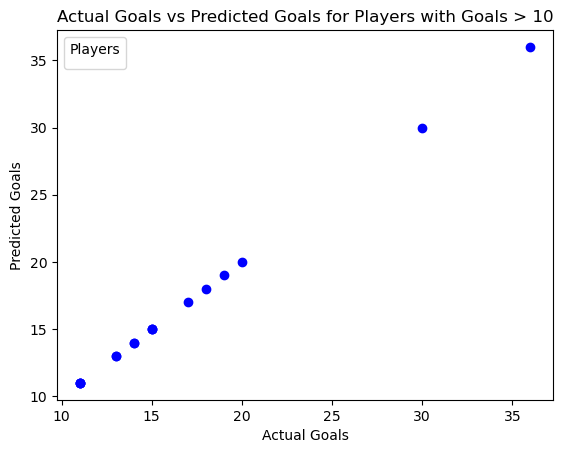

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import soccerdata as sd
import matplotlib.pyplot as plt
%matplotlib inline

# Load in FBref players via soccerdata web scraper
fbref = sd.FBref(leagues="ENG-Premier League", seasons=2022)
player_season_stats = fbref.read_player_season_stats(stat_type="standard")

# https://stackoverflow.com/questions/32938060/reverting-from-multiindex-to-single-index-dataframe-in-pandas
player_season_stats = player_season_stats.reset_index(level=['league','season', 'team', 'player'])
player_season_stats


#haaland_stats = player_season_stats[player_season_stats['player'] == ]

# Get the number of rows
num_rows = len(haaland_stats)

print("Number of data points for Erling Haaland:", num_rows)

#player_season_stats.loc[player_season_stats['player'] == 'Cristiano Ronaldo']

# Convert columns to numeric data types
player_season_stats[('Performance', 'Gls')] = pd.to_numeric(player_season_stats[('Performance', 'Gls')])
player_season_stats[('Expected', 'xG')] = pd.to_numeric(player_season_stats[('Expected', 'xG')])

# Create a scatter plot of goals vs expected goals
# plt.scatter(player_season_stats[('Expected', 'xG')], player_season_stats[('Performance', 'Gls')])

# # Set plot title and axis labels
# plt.title('Goals vs Expected Goals')
# plt.xlabel('Expected Goals (xG)')
# plt.ylabel('Goals (G)')

# # Show the plot
# plt.show()

# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# TODO uncomment this to predict only haalands goals?
#player_season_stats = player_season_stats.loc[player_season_stats['player'] == 'Erling Haaland']
#print(player_season_stats)
player_season_stats = player_season_stats[player_season_stats[('Performance', 'Gls')] > 10]
# TODO: ('team', '') - find highest xA on team and then add that as a contributing predictor?
X = player_season_stats[[('Per 90 Minutes', 'xG'), ('Performance', 'Gls'), ('Playing Time', 'Starts')]]
y = player_season_stats[[('Performance', 'Gls')]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# create model
lr = LinearRegression(fit_intercept=False)

# train model
lr.fit(X_train, y_train)
predicted_goals = lr.predict(X)

plt.scatter(player_season_stats[('Performance', 'Gls')], predicted_goals, color='blue')

#label it

plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.title('Actual Goals vs Predicted Goals for Players with Goals > 10')
plt.legend(title='Players')
plt.show()

# test model
#y_hat_train = lr.predict(X_train)
#y_pred_test = lr.predict(X_test)









